Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# DOMAĆI ZADATAK - zadatak 3
## april 2021. 

# Pavle Janevski 0055/2020

<font color='red'>
Preimenovati svesku u "domaci_zadatak_3_ime_prezime"<br></font>

# __Zadatak__: SIRV model
SIRV model epidemije uključuje mogućnost kontinualne vakcinacije određenog broja podložnih jedinki $v = v(t)$ tokom epidemije. Sistem diferencijalnih jednačina prvog reda koji opisuje kompartmane populacije se u tom slučaju izražava na sledeći način:

\begin{equation}
    \frac{dS}{dt} = -\alpha S I - v\\
    \frac{dI}{dt} = \alpha S I - \beta I\\
    \frac{dR}{dt} = \beta I + v
\end{equation}

gde je $S$ broj jedinki podložnih oboljevanju, $I$ broj zaraženih jedinki, $R$ broj uklonjenih jedinki, $\alpha$ konstanta brzine infekcije i $\beta$ konstanta brzine oporavka.  

Na početku epidemije jedna jedinka zaražena virusom influence (gripa) ulazi u izolovanu podložnu populaciju od $1000$ jedinki. Evolucija epidemije i proces kontinualne vakcinacije počinju u istom trenutku. Konstante brzine koje definišu širenje virusa su $\alpha = 0.002$, $\beta = 1$ i definišu se na nedeljnom (sedmičnom) nivou. 

Navedena populacija nalazi se unutar zemlje u razvoju koja nije u mogućnosti da finansira pun kapacitet kontinualne vakcinacije. Stoga povremeno dolazi do nestašice vakcina, pa se broj vakcinisanih podložnih jedinki menja u vremenu prema zavisnosti $v(t)$ prikazanoj na slici uz zadatak. Zavisnost $v(t)$ se sastoji od niza pozitivnih poluperioda harmonijske sinusne funkcije koja je opisana amplitudom $v = 50$ i frekvencijom $f = 0.25$/nedelja.

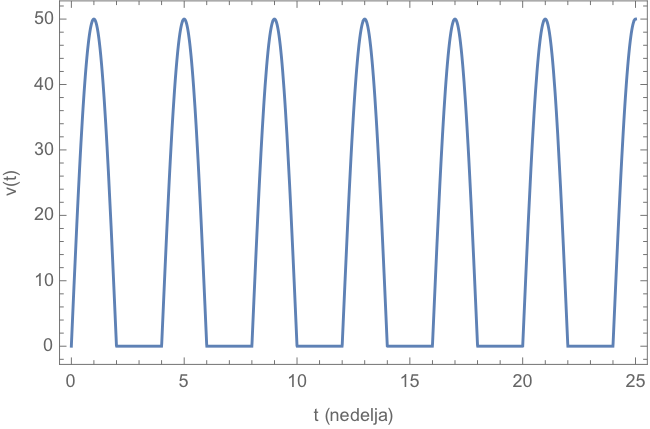

a)	Sastaviti matematički izraz (ili segment programskog koda u formi Python definicije) koji definiše i iscrtava zavisnost $v(t)$ na intervalu od $0$ do $25$ nedelja i reprodukovati sliku pridruženu uz zadatak.

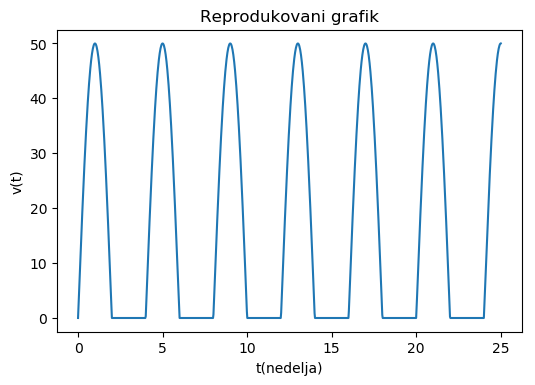

In [28]:
import numpy as np 
from scipy import integrate
import matplotlib.pyplot as plt

def foo(t, amp, f):
    x = np.maximum((np.sin(2 * np.pi * f * t) * amp), 0)
    return x

t = np.linspace(0, 25, 1000)
amp = 50
f = 0.25
vac = foo(t, amp, f);

plt.figure(dpi=100)
plt.plot(t, vac)
plt.xlabel('t(nedelja)')
plt.ylabel('v(t)')
plt.title("Reprodukovani grafik")
plt.show()

b)	Napisati Python definiciju koja opisuje sistem diferencijalnih jednačina SIRV modela u kome je dinamika vakcinacije definisana izrazom (ili Python definicijom) iz tačke a). Definiciji koja opisuje sistem diferencijalnih jednačina zadati $\alpha$, $\beta$ i $v$ kao kao argumente. 

In [29]:
def SIRV(poc, t, alfa, beta, v):
    S, I, R = poc
    x = foo(t, 50, 0.25) 
    return [-alfa*S*I - x, alfa*S*I - beta*I, beta*I + x]

c)	Rešiti sistem diferencijalnih jednačina na domenu od $0$ do $25$ nedelja sa početnim uslovima koji su naznačeni u opisu početka epidemije. Nacrtati zavisnosti $S(t)$, $I(t)$ i $R(t)$ na istom grafiku. Krive zavisnosti obeležiti različitim tipovima linija, različitim bojama i odgovarajućom legendom. Tipove linija, kao i njihove boje birati po sopstvenom nahođenju. Obeležiti $x$ i $y$ ose grafika, i dodati naslov u kome je potrebno da budu napisane vrednosti parametara $\alpha$ i $\beta$.

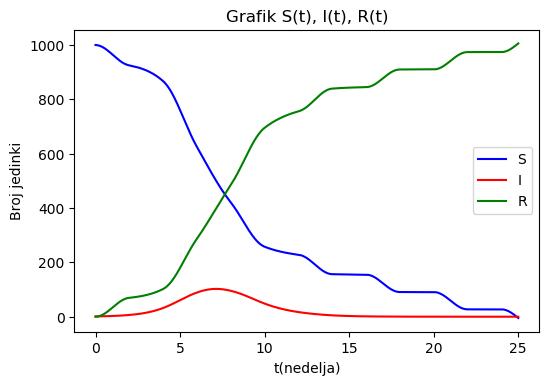

In [30]:
poc = (1000, 1, 0)
alfa = 0.002
beta = 1
t = np.linspace(0, 25, 1000)
sol = integrate.odeint(SIRV, poc, t, args=(alfa, beta, v))
plt.figure(dpi=100)
plt.plot(t, sol[:,0], linestyle="-", color="blue")
plt.plot(t, sol[:,1], linestyle="-", color="red")
plt.plot(t, sol[:,2], linestyle="-", color="green")
plt.legend(['S', 'I', 'R'])
plt.title("Grafik S(t), I(t), R(t)")
plt.xlabel('t(nedelja)')
plt.ylabel('Broj jedinki')
plt.show()

d) Koliko nedelja je potrebno da epidemija dostigne svoj maksimum? Napraviti definiciju koja traži sve maksimume proizvoljnog niza, a zatim iz svih lokalnih maksimuma izdvojiti globalni maksimum i vremenski trenutak u kome se dostiže. 

In [31]:
def find_max(a):
    len = np.size(a)
    res = list()
    for i in range(1,len):
        if a[i-1] < a[i] and a[i+1] < a[i]:
            res.append(a[i])
    return res
vv = sol[:,1]
maksimum = np.max(find_max(vv))
t_max = np.argmax(vv) * 25 / 1000
print(t_max)
print(maksimum)

7.125
102.4039023086999


<font>Maksimalna broj zarazenih je 102.4, dostize se nakon 7.1 nedelje.</font>

e) Koliko iznosi maksimalni broj zaraženih jedinki za date parametre? (Iskoristiti funkciju iz prethodnog pitanja). Komentarisati uticaj dinamike vakcinacije na trendove krivih $S(t)$, $I(t)$ i $R(t)$. 

<font>Maksimalan broj zarazenih je 102.4, nakon 7.1 nedelje. Epidemija traje kraca zbog vakcinacije, a najveci broj zarazenih se upravo dostize kada se dinamika vakcijanije smanji.</font>

f) Odrediti u kom trenutku je bezbedno prestati sa vakcinacijom jedinki u podložnoj populaciji i obrazložiti odgovor.

<font>Bezbedno je prestati kada broj zarazenih prestane da raste, odnosno kada ostaje isti kroz odredjeni broj dana. To se desava posle 15.nedelje. </font>

g) Ponoviti tačku c), odnosno reprodukovati grafik iz tačke c) rešavanjem sistema jednačina pomoću FDM (metoda konačnih razlika) metode umesto ugrađenim metodama kao u tački c). Na istoj slici prikazati zavisnosti $S(t)$, $I(t)$ i $R(t)$ dobijene rešavanjem pomoću ugrađenih metoda, kao i iste te zavisnosti dobijene rešavanjem pomoću FDM metode. Linije dobijene preko ugrađenih metoda prikazati kao isprekidane linije proizvoljnih boja, a linije dobijene rešavanjem pomoću FDM metode prikazati kao pune linije istih proizvoljno izabranih boja. Uneti legendu oznaka, kao i obeležja osa. 

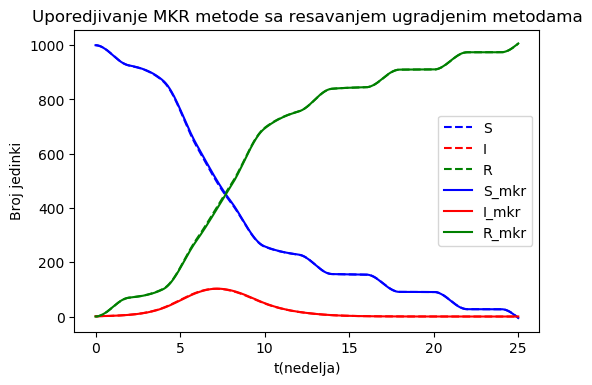

In [33]:
mkr = np.zeros([np.size(t),3])
mkr[0] = np.array(poc)
len = np.size(t)
for i in range(1,len):
    mkr[i] = mkr[i-1] + np.array(SIRV(mkr[i-1],t[i],alfa,beta,foo))*(t[i] - t[i-1])

plt.figure(dpi=100)
plt.plot(t, sol[:,0], linestyle="--", color="blue")
plt.plot(t, sol[:,1], linestyle="--", color="red")
plt.plot(t, sol[:,2], linestyle="--", color="green")
plt.plot(t, mkr[:,0], linestyle="-", color="blue")
plt.plot(t, mkr[:,1], linestyle="-", color="red")
plt.plot(t, mkr[:,2], linestyle="-", color="green")
plt.legend(['S', 'I', 'R', 'S_mkr', 'I_mkr', 'R_mkr'])
plt.xlabel('t(nedelja)')
plt.ylabel('Broj jedinki')
plt.title("Uporedjivanje MKR metode sa resavanjem ugradjenim metodama")
plt.show()